In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dg = xr.open_dataset('/mnt/c/Users/z5392640/OneDrive - UNSW/Documents/PhD/scientific_topics/heat_budget/neil_nci/colette/outer_avg.nc')
dg

<xarray.Dataset>
Dimensions:         (tracer: 2, boundary: 4, s_rho: 30, s_w: 31, eta_rho: 317,
                     xi_rho: 272, eta_u: 317, xi_u: 271, eta_v: 316, xi_v: 272,
                     eta_psi: 316, xi_psi: 271, ocean_time: 30)
Coordinates:
  * s_rho           (s_rho) float64 -0.9715 -0.9156 ... -0.0156 -0.004799
  * s_w             (s_w) float64 -1.0 -0.9433 -0.8883 ... -0.02161 -0.01 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 1994-02-01 ... 1994-03-02
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/128)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    nHIS            int32 ...
    ...              ...
    rain            (ocean_time, eta_rho, xi_rho) float32 ...
    swrad           (ocean_time, eta_rho, xi_rho) float32 ...
    sustr           (ocean_time, eta_u, xi_u) float32 ...
    svstr           (ocean_time, eta_v, xi_v) float32 ...
    bustr           (ocean_time, eta_u, xi_u) float32 ...
    bvstr           (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/34)
    file:              outer_avg.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS nonlinear model averages file
    title:             EAC OUTER GRID
    var_info:          varinfo.dat
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            006x008
    history:           ROMS/TOMS, Version 3.9, Thursday - November 23, 2023 -...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       EAC, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ANA_BTFLUX, ASS...

In [3]:
# Selecting a small area
xi_slice = slice(60, 160)
eta_slice = slice(140, 150)

lat_rho = dg["lat_rho"].isel(eta_rho=eta_slice, xi_rho=xi_slice)
lon_rho = dg["lon_rho"].isel(eta_rho=eta_slice, xi_rho=xi_slice)
lat_u = dg["lat_u"].isel(eta_u=eta_slice, xi_u=xi_slice)
lon_u = dg["lon_u"].isel(eta_u=eta_slice, xi_u=xi_slice)
lat_v = dg["lat_v"].isel(eta_v=eta_slice, xi_v=xi_slice)
lon_v = dg["lon_v"].isel(eta_v=eta_slice, xi_v=xi_slice)
pm = dg["pm"].isel(eta_rho=eta_slice, xi_rho=xi_slice)
pn = dg["pn"].isel(eta_rho=eta_slice, xi_rho=xi_slice)
h = dg["h"].isel(eta_rho=eta_slice, xi_rho=xi_slice)

area=np.divide(1,pm*pn)

In [4]:
# Getting the values where we have nan to use as mask
land_mask = np.isnan(dg.temp.isel(ocean_time=0, s_rho=-1, eta_rho=eta_slice, xi_rho=xi_slice))

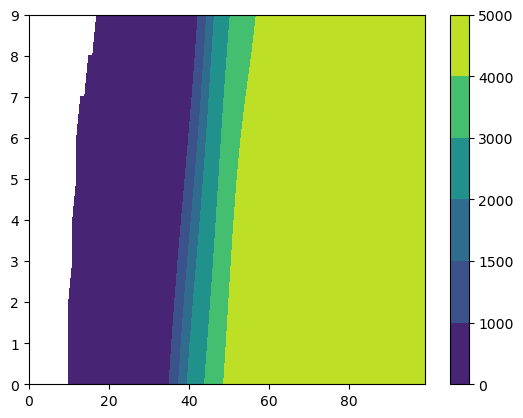

In [5]:
# Using the mask
# dg.temp.isel(ocean_time=0, s_rho=-1).where(~land_mask).where(h <= 200).isel(eta_rho=slice(30, -50), xi_rho=slice(30, -170)).plot(y='lat_rho', x='lon_rho')
h = h.where(~land_mask)
plt.contourf(h, levels=[0, 1000, 1500, 2000, 3000, 4000, 5000])
plt.colorbar()

In [6]:
# Fill in land with zeros:
h = h.fillna(0)
# h.where(h<=200).plot()


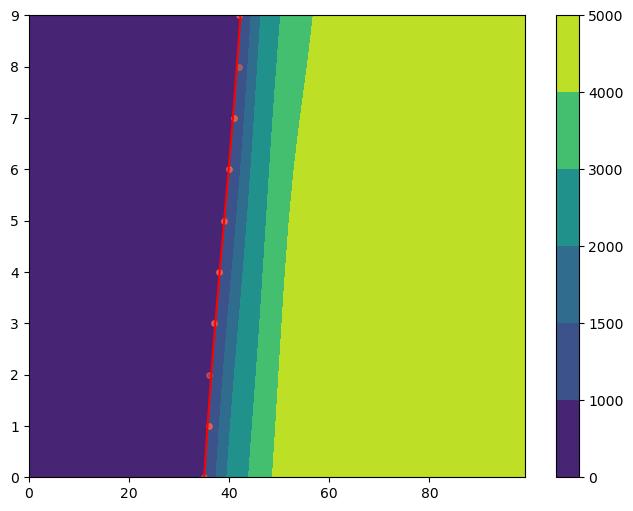

In [7]:
contour_depth = 1000.

x_var = lon_rho
y_var = lat_rho

fig = plt.figure(figsize = (8, 6))
count = 165 # contour 87 for 2000m isobath, 165 for 1500m
x_contour = []
y_contour = []

# Create the contour:
sc = plt.contour(h, levels=[contour_depth], colors='red')
plt.contourf(h, levels=[0, 1000, 1500, 2000, 3000, 4000, 5000])
plt.colorbar()
for collection in sc.collections:
    for path in collection.get_paths():
        # print(collection.get_paths())

        # count += 1
        # if count ==  212:
        # Write down the lat/lon indices
        for ii in range(np.size(path.vertices[:,0])):
            if int(np.round(path.vertices[ii][0])) < 125:   #FS added to select only the shelf break contour
                x_contour.append(int(np.round(path.vertices[ii][0])))
                y_contour.append(int(np.round(path.vertices[ii][1])))

plt.scatter(x_contour, y_contour, s=15, alpha=0.5, color='tomato');                

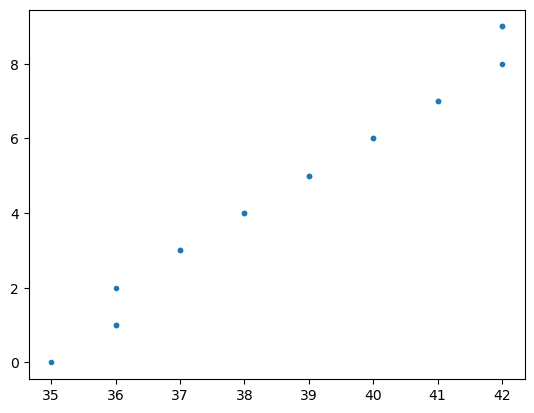

In [8]:
plt.plot(x_contour, y_contour, '.')

In [9]:
# Difference between two neighbouring indices
diff_x_contour = np.diff(x_contour)
diff_y_contour = np.diff(y_contour)


In [10]:
x_contour, y_contour

([42, 42, 42, 41, 41, 40, 40, 39, 39, 38, 38, 37, 37, 36, 36, 36, 35],
 [9, 9, 8, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 1, 1, 0])

In [11]:
diff_x_contour, diff_y_contour

(array([ 0,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0, -1]),
 array([ 0, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1,  0, -1]))

In [12]:
# Get a list with the indices of duplicates
diff_ind = []
for ii in range(len(diff_x_contour)):
    if (diff_x_contour[ii]==0) and (diff_y_contour[ii]==0):
        diff_ind.append(ii)


In [13]:
#if both diff_y_contour and diff_x_contour == 0, means duplicate point
diff_ind

[0, 3, 5, 7, 9, 11, 14]

In [14]:
# Now remove the indices (start from the end so the indices don't shift)
for ii in range(len(diff_ind)):
    index = diff_ind[::-1][ii]
    del x_contour[index]
    del y_contour[index]

In [15]:
x_contour, y_contour

([42, 42, 41, 40, 39, 38, 37, 36, 36, 35], [9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

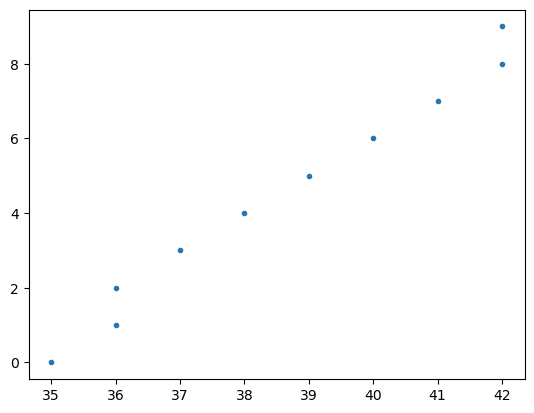

In [16]:
plt.plot(x_contour, y_contour, '.')

In [17]:
# Getting the bathymetry for the contour
h_contour = np.zeros(len(x_contour))

for ii in range(len(h_contour)):
    h_contour[ii] = h[y_contour[ii], x_contour[ii]]

Text(0.5, 1.0, 'This is the bathymetry for the chosen contour')

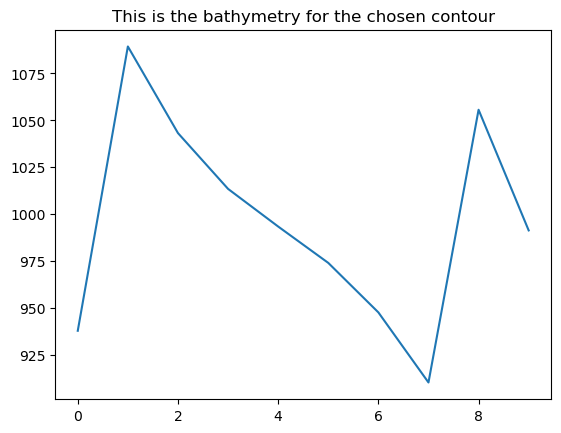

In [18]:
plt.plot(h_contour)
plt.title('This is the bathymetry for the chosen contour')

In [19]:
# Choose whether you want your contour on the u or t grid.
x_var = lon_rho
y_var = lat_rho

x_var, y_var


(<xarray.DataArray 'lon_rho' (eta_rho: 10, xi_rho: 100)>
 [1000 values with dtype=float64]
 Coordinates:
     lon_rho  (eta_rho, xi_rho) float64 ...
     lat_rho  (eta_rho, xi_rho) float64 ...
 Dimensions without coordinates: eta_rho, xi_rho
 Attributes:
     long_name:      longitude of RHO-points
     units:          degree_east
     standard_name:  longitude
     field:          lon_rho, scalar,
 <xarray.DataArray 'lat_rho' (eta_rho: 10, xi_rho: 100)>
 [1000 values with dtype=float64]
 Coordinates:
     lon_rho  (eta_rho, xi_rho) float64 ...
     lat_rho  (eta_rho, xi_rho) float64 ...
 Dimensions without coordinates: eta_rho, xi_rho
 Attributes:
     long_name:      latitude of RHO-points
     units:          degree_north
     standard_name:  latitude
     field:          lat_rho, scalar)

In [20]:
# Getting lat and lon from the indexes
lat_along_contour = np.zeros((len(x_contour)))
lon_along_contour = np.zeros((len(x_contour)))

# FS why do we need -1 here???
for ii in range(len(h_contour)):
    # print(ii-1)
    # lon_along_contour[ii] = x_var[y_contour[ii-1],x_contour[ii-1]]
    # lat_along_contour[ii] = y_var[y_contour[ii-1],x_contour[ii-1]]
    lon_along_contour[ii] = x_var[y_contour[ii],x_contour[ii]]
    lat_along_contour[ii] = y_var[y_contour[ii],x_contour[ii]]    

In [21]:
lon_along_contour, lat_along_contour 

(array([152.62388636, 152.6069539 , 152.5647379 , 152.52249394,
        152.48022193, 152.4379218 , 152.39559346, 152.35323685,
        152.33618973, 152.29378642]),
 array([-33.0196747 , -33.06202371, -33.09666583, -33.13130795,
        -33.16595008, -33.2005922 , -33.23523432, -33.26987644,
        -33.31222546, -33.34686758]))

In [22]:
# FS: My method. I think it is safer because I am informing the dimensions to be used, instead of selection columns...
lat_along_contour = list()
lon_along_contour = list()
for xx, yy in zip(x_contour, y_contour):
    lon_along_contour.append(x_var.isel(xi_rho=xx, eta_rho=yy).values)
    lat_along_contour.append(y_var.isel(xi_rho=xx, eta_rho=yy).values)


lon_along_contour, lat_along_contour

([array(152.62388636),
  array(152.6069539),
  array(152.5647379),
  array(152.52249394),
  array(152.48022193),
  array(152.4379218),
  array(152.39559346),
  array(152.35323685),
  array(152.33618973),
  array(152.29378642)],
 [array(-33.0196747),
  array(-33.06202371),
  array(-33.09666583),
  array(-33.13130795),
  array(-33.16595008),
  array(-33.2005922),
  array(-33.23523432),
  array(-33.26987644),
  array(-33.31222546),
  array(-33.34686758)])

In [23]:
# Repeat the leftmost point at the end of the array.
# (Required for masking contour above and below)
# FS: is this the same approach for my contour orientation??
lat_along_contour = np.append(lat_along_contour, lat_along_contour[0])
lon_along_contour = np.append(lon_along_contour, lon_along_contour[0])

In [24]:
lat_along_contour

array([-33.0196747 , -33.06202371, -33.09666583, -33.13130795,
       -33.16595008, -33.2005922 , -33.23523432, -33.26987644,
       -33.31222546, -33.34686758, -33.0196747 ])

In [25]:
# Number of grid points on the contour
num_points = len(lat_along_contour)

# Now we number the points along the contour
contour_mask_numbered = np.zeros_like(lon_along_contour)

for ii in range(num_points-1):
    lat1 = lat_along_contour[ii]
    lat2 = lat_along_contour[ii+1]
    lon1 = lon_along_contour[ii]
    lon2 = lon_along_contour[ii+1]
    contour_mask_numbered[ii] = ii

contour_mask = h*0

for ii in range(num_points-1):
    contour_mask[y_contour[ii], x_contour[ii]] = contour_mask_numbered[ii]+1

contour_mask_numbered = contour_mask

In [26]:
contour_mask_numbered[0], contour_mask_numbered[-2]

(<xarray.DataArray 'h' (xi_rho: 100)>
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
 Coordinates:
     lon_rho     (xi_rho) float64 151.4 151.4 151.5 151.5 ... 154.0 154.1 154.1
     lat_rho     (xi_rho) float64 -33.08 -33.08 -33.09 ... -33.88 -33.89 -33.9
     s_rho       float64 -0.004799
     ocean_time  datetime64[ns] 1994-02-01
 Dimensions without coordinates: xi_rho,
 <xarray.DataArray 'h' (xi_rho: 100)>
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

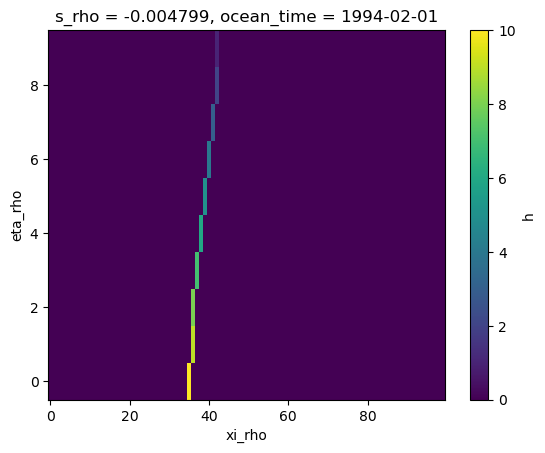

In [27]:
contour_mask_numbered.plot()

In [28]:
# fill in points to south of contour:
# FS: just one point filled in?? In my case should be west/east?? The row numbers increase to the north, so -1 is the last row to the north
mask_value = -1000
contour_masked_above = np.copy(contour_mask_numbered)
contour_masked_above[-1, 0] = mask_value

In [29]:
contour_masked_above

array([[    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,    10.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,

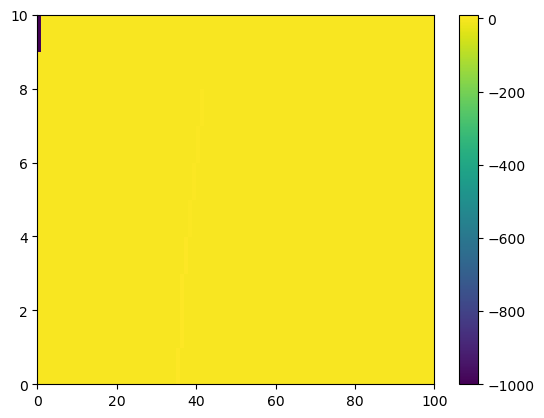

In [30]:
plt.pcolor(contour_masked_above)
plt.colorbar()

In [31]:
# FS: SPEND MORE TIME UNDERSTANDING THIS PART!! IT SEEMED TO WORK, BUT I DON'T KNOW EXACTLY WHY!!

#Create mask
#Now we create a mask below contour sothat the direction of the contour can be determined

#Remark on computational inefficiency:
#Note that creating masks with nested for loops is very inefficient. We should probably use boolean masks (just compare the entire array with mask_value), and DataArray.shift() or DataArray.roll() from each of the directions to generate the masks without using loops.
#See discussion in: https://github.com/COSIMA/cosima-recipes/issues/179

print(contour_masked_above.shape, contour_mask_numbered.shape)
print(contour_masked_above[-20:-1, 0])

# fill in one cell to the west of the contour with value mask_value:
contour_masked_above = np.copy(contour_mask_numbered)
contour_masked_above[-1, 0] = mask_value

# from top left:
for ii in range(len(contour_mask[0,:])-1): #x: len(x-axis) - 1
    for jj in range(len(contour_mask[:,0]))[::-1][:-1]: #y: len(y-axis)[from end to start, inverse order][from first to (end-1)]
        if contour_masked_above[jj, ii] == mask_value: # if north of contour line
            if contour_masked_above[jj-1, ii] == 0: # if previous cell in Y-dir is zero (= south of contour line)
                contour_masked_above[jj-1, ii] = mask_value # make it -1000
            if contour_masked_above[jj, ii+1] == 0: # if next cell in X-dir is zero
                contour_masked_above[jj, ii+1] = mask_value # make it -1000

#from top right:
for ii in range(len(contour_mask[0,:]))[::-1][:-1]:
    for jj in range(len(contour_mask[:,0]))[::-1][:-1]:
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj-1, ii] == 0: # if previous cell in Y-dir is zero
                contour_masked_above[jj-1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0: # if previous cell in X-dir is zero
                contour_masked_above[jj, ii-1] = mask_value

# from bottom right:
for ii in range(len(contour_mask[0,:]))[::-1][:-1]:
    for jj in range(len(contour_mask[:,0])-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0: # if next cell in Y-dir is zero
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0: # if previous cell in X-dir is zero
                contour_masked_above[jj, ii-1] = mask_value

#from bottom left:
for ii in range(len(contour_mask[0,:])-1):
    for jj in range(len(contour_mask[:,0])-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0: # if next cell in Y-dir is zero
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii+1] == 0: # if next cell in X-dir is zero
                contour_masked_above[jj, ii+1] = mask_value

(10, 100) (10, 100)
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


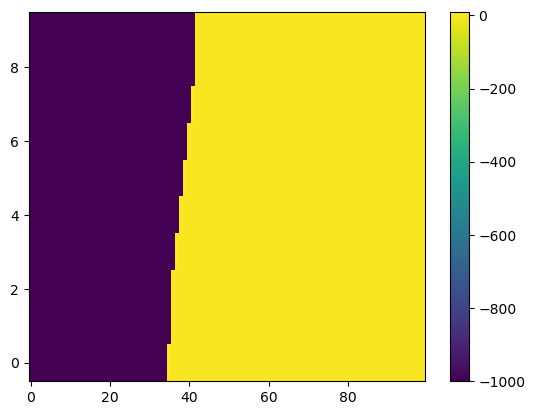

In [32]:
plt.pcolormesh(contour_mask.xi_rho, contour_mask.eta_rho, contour_masked_above)
plt.colorbar();

In [33]:
import numpy.ma as ma

# mask_shelf2 = ma.masked_where(contour_masked_above == -1000, np.ones(h.shape))  #FS not being used?

# Direction of cross-contour transport

mask_x_transport = np.zeros_like(contour_mask_numbered)
mask_y_transport = np.zeros_like(contour_mask_numbered)

mask_y_transport_numbered = np.zeros_like(contour_mask_numbered)
mask_x_transport_numbered = np.zeros_like(contour_mask_numbered)

# make halos: add 2 extra columns with the value of the last/first columns of the original
shape = contour_masked_above.shape
contour_masked_above_halo = np.zeros((shape[0], shape[1]+2))
contour_masked_above_halo[:, 0] = contour_masked_above[:, 0]  # Inverted this one
contour_masked_above_halo[:, 1:-1] = contour_masked_above
contour_masked_above_halo[:, -1] = contour_masked_above[:, -1] # with this one!

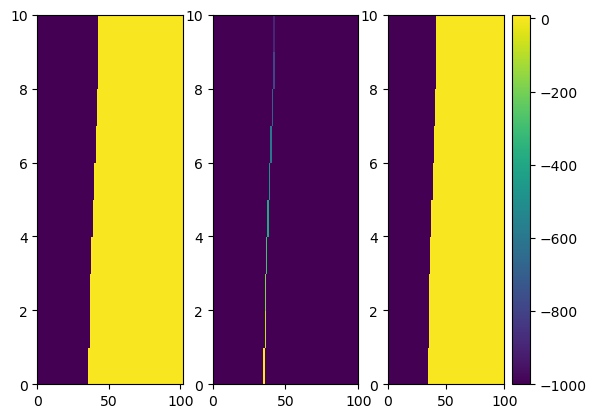

In [34]:
fig, ax = plt.subplots(ncols=3)
ax[0].pcolor(contour_masked_above_halo)
ax[1].pcolor(contour_mask_numbered)
pc = ax[2].pcolor(contour_masked_above); plt.colorbar(pc)

In [ ]:

new_number_count = 1
# for mask_loc in range(1, int(np.max(contour_mask_numbered))+1):
    # print(mask_loc)

mask_loc = 1
# Getting xi and eta indexes for the number correlated. 
# The lower numbers or CONTOUR_MASK_NUMBERED are located at the northward part: 1 more north than 10
# The higher index_j the more north you are in the domain.... So index_j-1 you displace one cell SOUTH.
# ALSO: an index_j=-1 means last row to north of the domain.
index_i = np.where(contour_mask_numbered==mask_loc)[1]
index_j = np.where(contour_mask_numbered==mask_loc)[0]


# if point above is towards Antarctica and point below is away from Antarctica:
# take transport grid point to north of t grid:
if (contour_masked_above[index_j, index_i]==0) and (contour_masked_above[index_j-1, index_i]!=0):
    mask_y_transport[index_j, index_i] = -1
    # important to do
    mask_y_transport_numbered[index_j, index_i] = new_number_count
    new_number_count += 1
# if point below is towards Antarctica and point above is away from Antarctica:
# take transport grid point to south of t grid:
elif (contour_masked_above[index_j-1, index_i]==0) and (contour_masked_above[index_j+1, index_i]!=0):
    mask_y_transport[index_j-1, index_i] = 1
    mask_y_transport_numbered[index_j-1, index_i] = new_number_count
    new_number_count += 1
# if point to right is towards Antarctica and point to left is away from Antarctica:
# zonal indices increased by 1 due to halos
# take transport grid point on right of t grid:
if (contour_masked_above_halo[index_j, index_i+2]==0) and (contour_masked_above_halo[index_j, index_i]!=0):
    mask_x_transport[index_j, index_i] = -1
    mask_x_transport_numbered[index_j, index_i] = new_number_count
    new_number_count += 1
# if point to left is towards Antarctica and point to right is away from Antarctica:
# take transport grid point on left of t grid:
elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j, index_i+2]!=0):
    mask_x_transport[index_j, index_i-1] = 1
    mask_x_transport_numbered[index_j, index_i-1] = new_number_count
    new_number_count += 1


In [ ]:
contour_masked_above[index_j-2, index_i]

In [ ]:
index_j

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6))
ax[0].pcolor(mask_x_transport)
ax[1].pcolor(mask_y_transport)

In [ ]:
print(pm.shape, pn.shape)

In [ ]:
import pyresample

rho_def = pyresample.geometry.SwathDefinition(lons=lon_rho,lats=lat_rho)
u_def = pyresample.geometry.SwathDefinition(lons=lon_u,lats=lat_u)
v_def = pyresample.geometry.SwathDefinition(lons=lon_v,lats=lat_v)

In [ ]:

wf = lambda r: 1/r

mask_x_transport_Ugrd = pyresample.kd_tree.resample_custom(rho_def,mask_x_transport,u_def,\
                                            radius_of_influence=100000,neighbours=1,weight_funcs=wf)
mask_y_transport_Vgrd = pyresample.kd_tree.resample_custom(rho_def,mask_y_transport,v_def,\
                                            radius_of_influence=100000,neighbours=1,weight_funcs=wf)
mask_x_transport_numbered_Ugrd = pyresample.kd_tree.resample_custom(rho_def,mask_x_transport_numbered,u_def,\
                                            radius_of_influence=100000,neighbours=1,weight_funcs=wf)
mask_y_transport_numbered_Vgrd = pyresample.kd_tree.resample_custom(rho_def,mask_y_transport_numbered,v_def,\
                                            radius_of_influence=100000,neighbours=1,weight_funcs=wf)


In [ ]:
# Convert contour masks to data arrays, so we can multiply them later.
# We need to ensure the lat lon coordinates correspond to the actual data location:
#       The y masks are used for ty_trans, so like vhrho this should have dimensions (yu_ocean, xt_ocean).
#       The x masks are used for tx_trans, so like uhrho this should have dimensions (yt_ocean, xu_ocean).
#       However the actual name will always be simply y_ocean/x_ocean irrespective of the variable
#       to make concatenation of transports in both direction and sorting possible.
coordinates=dict(one=lon_rho, two=lat_rho)
coordinatesU=dict(one=lon_u, two=lat_u)
coordinatesV=dict(one=lon_v, two=lat_v)


mask_x_transport_Ugrd = xr.DataArray(mask_x_transport_Ugrd, coords = coordinatesU, dims = ['eta_u', 'xi_u'])
mask_y_transport_Vgrd = xr.DataArray(mask_y_transport_Vgrd, coords = coordinatesV, dims = ['eta_v', 'xi_v'])
mask_x_transport_numbered_Ugrd = xr.DataArray(mask_x_transport_numbered_Ugrd, coords = coordinatesU, dims = ['eta_u', 'xi_u'])
mask_y_transport_numbered_Vgrd = xr.DataArray(mask_y_transport_numbered_Vgrd, coords = coordinatesV, dims = ['eta_v', 'xi_v'])

# rename dimensions as simply eta/xi
mask_x_transport_Ugrd = mask_x_transport_Ugrd.rename({'eta_u': 'eta','xi_u': 'xi'})
mask_y_transport_Vgrd = mask_y_transport_Vgrd.rename({'eta_v': 'eta','xi_v': 'xi'})
mask_x_transport_numbered_Ugrd = mask_x_transport_numbered_Ugrd.rename({'eta_u': 'eta','xi_u': 'xi'})
mask_y_transport_numbered_Vgrd = mask_y_transport_numbered_Vgrd.rename({'eta_v': 'eta','xi_v': 'xi'})

In [ ]:
mask_x_transport_numbered_Ugrd.plot()

In [ ]:
# Create the contour order data-array. Note that in this procedure the x-grid counts have x-grid
#   dimensions and the y-grid counts have y-grid dimensions, but these are implicit, the dimension
#   *names* are kept general across the counts, the generic y_ocean, x_ocean, so that concatening works
#   but we dont double up with numerous counts for one lat/lon point.

# stack contour data into 1d:
mask_x_numbered_1d = mask_x_transport_numbered_Ugrd.stack(contour_index = ['eta', 'xi'])
mask_x_numbered_1d = mask_x_numbered_1d.where(mask_x_numbered_1d > 0, drop = True)

mask_y_numbered_1d = mask_y_transport_numbered_Vgrd.stack(contour_index = ['eta', 'xi'])
mask_y_numbered_1d = mask_y_numbered_1d.where(mask_y_numbered_1d > 0, drop = True)

contour_ordering = xr.concat((mask_x_numbered_1d, mask_y_numbered_1d), dim = 'contour_index', data_vars="all")
contour_ordering = contour_ordering.sortby(contour_ordering)
contour_index_array = np.arange(1, len(contour_ordering)+1)

In [ ]:
contour_index_array

In [ ]:
temp = dg.temp.isel(ocean_time=0)
v = dg.v_northward.isel(ocean_time=0)
u = dg.u_eastward.isel(ocean_time=0)


In [ ]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1


# Bad calculation of heat transport, due to the use of rho points!!!! FS
v_heat_trans = (temp * v * Cp * rho0).isel(eta_rho=eta_slice, xi_rho=xi_slice).rename({'eta_rho': 'eta','xi_rho': 'xi'})
u_heat_trans = (temp * u * Cp * rho0).isel(eta_rho=eta_slice, xi_rho=xi_slice).rename({'eta_rho': 'eta','xi_rho': 'xi'})





In [ ]:
u_heat_trans.isel(s_rho=-1).plot()

In [ ]:
mask_y_transport_Vgrd.plot()

In [ ]:

def extract_transp_across_contour(temp, var_x, var_y):   # var:4D [time,eta_rho,xi_rho]

    zlen = len(temp[:,0,0])
    tlen = 1
    print(tlen,zlen)
    transp_across_contour = np.empty((tlen,zlen,len(contour_ordering)))

    for tt in range(0,tlen): # loop through time
        for zz in range(0,zlen): # loop through z-levels

            print('Debugging high memory usage: ')
            print(tt, zz)

            var_x_tmp = var_x.isel(s_rho=zz) * mask_x_transport_Ugrd
            var_y_tmp = var_y.isel(s_rho=zz) * mask_y_transport_Vgrd
            
            print('var_x_tmp/var_y_tmp shapes after mask multip.:')
            print(var_x_tmp.shape, var_y_tmp.shape)
            
            # stack transports into 1d and drop any points not on contour:
            x_var_1d_tmp = var_x_tmp.stack(contour_index = ['eta', 'xi'])
            x_var_1d_tmp = x_var_1d_tmp.where(mask_x_numbered_1d>0, drop = True)
            y_var_1d_tmp = var_y_tmp.stack(contour_index = ['eta', 'xi'])
            y_var_1d_tmp = y_var_1d_tmp.where(mask_y_numbered_1d>0, drop = True)

            print('x_var_1d_tmp/y_var_1d_tmp shapes after stack:')
            print(x_var_1d_tmp.shape, y_var_1d_tmp.shape)

            # combine all points on contour:
            transp_across_contour_tmp = xr.concat((x_var_1d_tmp, y_var_1d_tmp), dim = 'contour_index')
            transp_across_contour_tmp = transp_across_contour_tmp.reset_index('contour_index') # added by fabio, otherwise it crashes due to duplicated indices
            transp_across_contour_tmp = transp_across_contour_tmp.sortby(contour_ordering)
            transp_across_contour_tmp.coords['contour_index'] = contour_index_array
            transp_across_contour_tmp = transp_across_contour_tmp.load()

            print(tt, zz, transp_across_contour_tmp.shape)
            transp_across_contour[tt,zz,:] = transp_across_contour_tmp
            del transp_across_contour_tmp

    return transp_across_contour

In [ ]:
transp_across_contour.shape

In [ ]:
transp_across_contour = extract_transp_across_contour(temp, u_heat_trans, v_heat_trans)

In [ ]:

# zlen = len(temp[:,0,0])
# print(zlen)
# transp_across_contour = np.empty((zlen,len(contour_ordering)))

# for zz in range(0,zlen): # loop through z-levels

#     print('Debugging high memory usage: ')
#     print(zz)

#     var_x_tmp = u_heat_trans.isel(s_rho=zz) * mask_x_transport_Ugrd
#     var_y_tmp = v_heat_trans.isel(s_rho=zz) * mask_y_transport_Vgrd
    
#     print('var_x_tmp/var_y_tmp shapes after mask multip.:')
#     print(var_x_tmp.shape, var_y_tmp.shape)
    
#     # stack transports into 1d and drop any points not on contour:
#     x_var_1d_tmp = var_x_tmp.stack(contour_index = ['eta', 'xi'])
#     x_var_1d_tmp = x_var_1d_tmp.where(mask_x_numbered_1d>0, drop = True)
#     y_var_1d_tmp = var_y_tmp.stack(contour_index = ['eta', 'xi'])
#     y_var_1d_tmp = y_var_1d_tmp.where(mask_y_numbered_1d>0, drop = True)

#     print('x_var_1d_tmp/y_var_1d_tmp shapes after stack:')
#     print(x_var_1d_tmp.shape, y_var_1d_tmp.shape)

#     # combine all points on contour:
#     transp_across_contour_tmp = xr.concat((x_var_1d_tmp, y_var_1d_tmp), dim = 'contour_index')
#     transp_across_contour_tmp = transp_across_contour_tmp.reset_index('contour_index') # added by fabio, otherwise it crashes due to duplicated indices
#     transp_across_contour_tmp = transp_across_contour_tmp.sortby(contour_ordering)
#     transp_across_contour_tmp.coords['contour_index'] = contour_index_array
#     transp_across_contour_tmp = transp_across_contour_tmp.load()

#     print(zz, transp_across_contour_tmp.shape)
#     transp_across_contour[zz,:] = transp_across_contour_tmp
#     del transp_across_contour_tmp

In [ ]:
plt.pcolormesh(transp_across_contour.squeeze())
plt.colorbar()